In [7]:
import pandas as pd 
class CombineInOut():
    def __init__(self, data_ins, data_outs):
        print('Combine Class: init')
        # combine inside and outside data and interpolate based on time of inside
        # data_outs = pd.merge(data_outs, data_solar, on='time', how='outer')
        data = pd.merge(data_ins, data_outs, on='time', how='outer')
        # print(data)
        # Converting the index to DatetimeIndex
        data.index = pd.to_datetime(data['time'])
        data_interp = data.interpolate(method='time')
        # print(data_interp)
        # Get Out NaNs
        # data_interp = data_interp.dropna()
        # print(data_interp)
        # data_interp = data_interp.drop(columns=['humidity_x', 'pressure_x', 'current', 'voltage', 'humidity_y', 'pressure_y', 'Live_Irms', 'temperature_y',  'Irms'], axis=1)
        # create a TimeSeries object from the dataframe
        # resample the data to a 10-second frequency
        df_resampled = data_interp.resample('60S').mean()
        # Drop NaN values by interpolating
        df_resampled = df_resampled.interpolate(method='time')
        df_resampled = df_resampled.resample('60S').mean()
        print(df_resampled)
        self.df_resampled = df_resampled


In [32]:
combined_class = CombineInOut(pd.read_csv('Dataset2/data_inside.csv'), pd.read_csv('Dataset2/data_outside.csv'))

Combine Class: init
                     temperature_x  humidity_x     pressure_x   current  \
time                                                                      
2023-05-08 16:24:00       4.572037   30.821900  101787.634002  65401.45   
2023-05-08 16:25:00       4.529743   30.958670  101788.649805  65401.45   
2023-05-08 16:26:00       4.486679   31.439807  101786.686204  65401.45   
2023-05-08 16:27:00       4.458993   32.250826  101784.608768  65401.45   
2023-05-08 16:28:00       4.453847   33.309038  101785.754517  65401.45   
...                            ...         ...            ...       ...   
2023-05-14 17:52:00       5.623443   55.293717  101497.757765  65401.45   
2023-05-14 17:53:00       5.722054   56.021969  101497.877259  65401.45   
2023-05-14 17:54:00       5.826653   56.701969  101498.675203  65401.45   
2023-05-14 17:55:00       5.921016   57.271969  101497.324850  65401.45   
2023-05-14 17:56:00       5.989034   57.737676  101497.582188  65401.45   

    

C:\Users\TomK2\AppData\Local\Temp\ipykernel_15532\2069533155.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = data_interp.resample('60S').mean()


In [33]:
combined_class.df_resampled 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

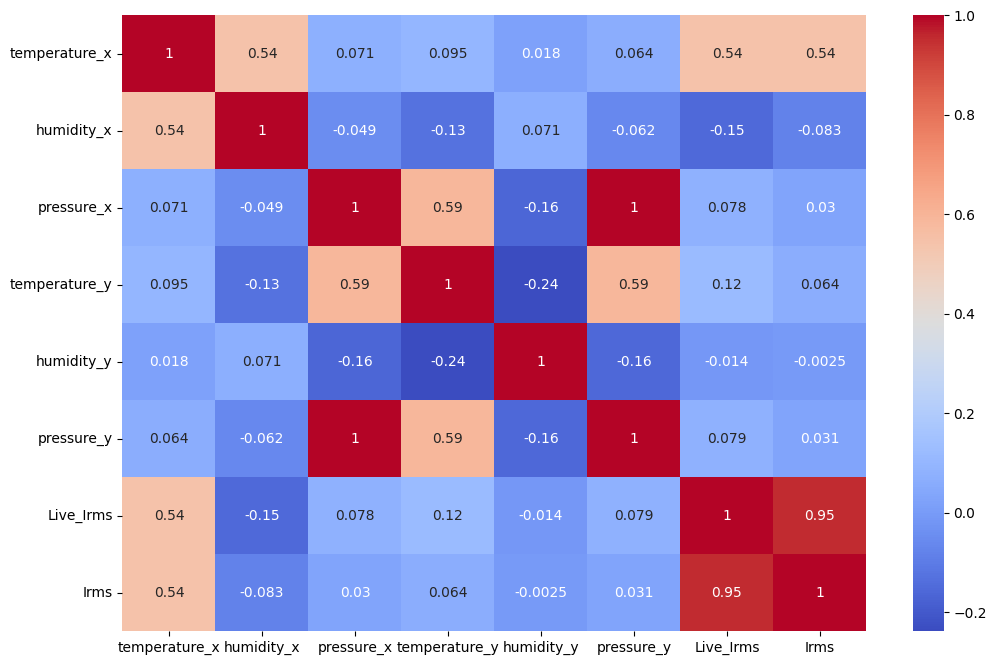

In [36]:
plt.figure(figsize=(12,8))
combined_class.df_resampled = combined_class.df_resampled.drop(columns=['Irmss'])

sns.heatmap(combined_class.df_resampled.corr(), annot=True, cmap='coolwarm')